In [1]:
import pandas as pd 
import numpy as np

In [33]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [51]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [196]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [174]:
from sklearn.model_selection import train_test_split
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
from matplotlib import pyplot as plt
from sklearn.metrics import plot_precision_recall_curve
from sklearn.model_selection import GridSearchCV

In [19]:
data = pd.read_json('train.json', lines=True)

In [30]:
data

,context,question,answer,pairID,answer_bin
0,Способность к адаптации сенсорной системы к по...,Является ли сниженние абсолютной чувствительно...,да,571247699fe0b04318e283fb82bac5bd,1
1,Обеспечение возможности познания внешнего мира...,"Бывет ли, что люди со выраженным нарушением зр...",нет,7abba7d0ebdd11d6ccaed554ebd1900a,0
2,Ощущение положения тела в пространстве связано...,Двигательный анализатор вносит значительный вк...,да,a926a713418b6078db042e33bf1eea29,1
3,Нуждаемость в санитарной обработке не определя...,"Сильные кислоты нельзя отнести к ""агрессивным""...",нет,ab409ce3b0e248506bc164ec47d151e3,0
4,"Ведущим фактором лучевого поражения организма,...","Могут ли клетки, сохранившие жизнеспособность,...",да,3bee65e5934a3a7bcad46067ab900029,1
...,...,...,...,...,...
1303,Активное вещество Кондилина — подофиллотоксин ...,Подофиллотоксин является веществом синтетическ...,нет,d5f5f62ecf49f9a0c8c8b132865b601f,0
1304,Опоясывающий лишай (опоясывающий герпес) — ост...,В организме вирус сохраняется в узлах тройничн...,да,d913dd3bf7425919ecf6ee4f60b59218,1
1305,"Листерии — короткие грамположительные палочки,...",Эта инфекция попадает в организм человека чере...,нет,d761bf616b3c73ee968192fe9099daea,0
1306,Диагноз биполярного аффективного расстройства ...,Биполярное расстройство относится к рецидивиру...,да,6a868ee8ae15e107a29eaa0733fea60a,1


In [23]:
data['answer'].value_counts()

нет    654
да     654
Name: answer, dtype: int64

In [13]:
print(data['context'][0])
print()
print(data['question'][0])
print()
print(data['answer'][0])

Способность к адаптации сенсорной системы к постоянной силе длительно действующего раздражителя заключается в основном в понижении абсолютной и повышении дифференциальной чувствительности. Это свойство присуще всем отделам анализатора, но наиболее ярко оно проявляется на уровне рецепторов и заключается в изменении не только их возбудимости и импульсации, но и показателей функциональной мобильности, т.е. способности к изменению числа функционирующих рецепторных структур (П.Г.Снякин).

Является ли сниженние абсолютной чувствительности рецепторов одним из основных способов адаптации сенсорной системы?

да


In [14]:
print(data['context'][1])
print()
print(data['question'][1])
print()
print(data['answer'][1])

Обеспечение возможности познания внешнего мира. Внешние анализаторы — это многоканальная система связи с внешним миром, поскольку организм имеет не один анализатор, а несколько. С помощью анализаторов организм познает свойства предметов и явлений окружающей среды, полезные и негативные стороны его воздействия. Поэтому нарушения функции внешних анализаторов, особенно зрительного и слухового, чрезвычайно сильно затрудняют познание внешнего мира (очень беден окружающий мир для слепого или глухого).

Бывет ли, что люди со выраженным нарушением зрительной и слуховой функции не испытавают значительных нарушений в познании внешнего мира?

нет


In [29]:
data['answer_bin'] = [1 if x == 'да' else 0 for x in data['answer']]

In [31]:
data_droped = data.drop(['answer', 'pairID'], axis=1)

In [32]:
data_droped

,context,question,answer_bin
0,Способность к адаптации сенсорной системы к по...,Является ли сниженние абсолютной чувствительно...,1
1,Обеспечение возможности познания внешнего мира...,"Бывет ли, что люди со выраженным нарушением зр...",0
2,Ощущение положения тела в пространстве связано...,Двигательный анализатор вносит значительный вк...,1
3,Нуждаемость в санитарной обработке не определя...,"Сильные кислоты нельзя отнести к ""агрессивным""...",0
4,"Ведущим фактором лучевого поражения организма,...","Могут ли клетки, сохранившие жизнеспособность,...",1
...,...,...,...
1303,Активное вещество Кондилина — подофиллотоксин ...,Подофиллотоксин является веществом синтетическ...,0
1304,Опоясывающий лишай (опоясывающий герпес) — ост...,В организме вирус сохраняется в узлах тройничн...,1
1305,"Листерии — короткие грамположительные палочки,...",Эта инфекция попадает в организм человека чере...,0
1306,Диагноз биполярного аффективного расстройства ...,Биполярное расстройство относится к рецидивиру...,1


In [34]:
data_fuzz = data_droped.copy()

In [70]:
WRatio = []
token_sort_ratio = []
partial_ratio = []

for i in range(len(data_fuzz)):
    WRatio.append(fuzz.WRatio(data_fuzz['context'][i], data_fuzz['question'][i]))
    token_sort_ratio.append(fuzz.token_sort_ratio(data_fuzz['context'][i], data_fuzz['question'][i]))
    partial_ratio.append(fuzz.partial_ratio(data_fuzz['context'][i], data_fuzz['question'][i]))

In [71]:
data_fuzz['WRatio'] = WRatio
data_fuzz['token_sort_ratio'] = token_sort_ratio
data_fuzz['partial_ratio'] = partial_ratio

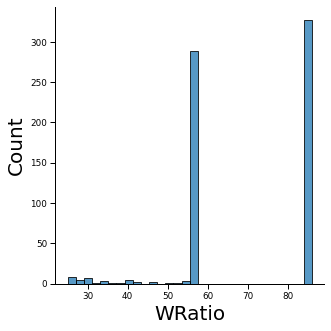

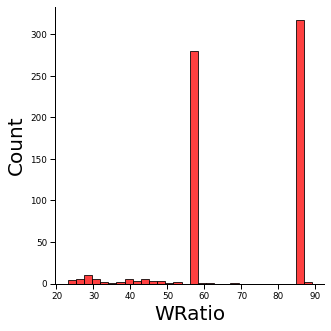

In [64]:
data = data_fuzz[data_fuzz['answer_bin'] > 0]['WRatio']

sns.displot(data, bins = 30)

plt.show()

data = data_fuzz[data_fuzz['answer_bin'] == 0]['WRatio']

sns.displot(data, bins = 30, color="red")

plt.show()

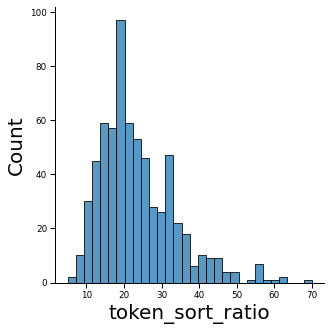

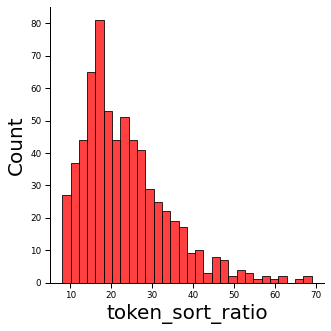

In [69]:
data = data_fuzz[data_fuzz['answer_bin'] > 0]['token_sort_ratio']

sns.displot(data, bins = 30)

plt.show()

data = data_fuzz[data_fuzz['answer_bin'] == 0]['token_sort_ratio']

sns.displot(data, bins = 30, color="red")

plt.show()

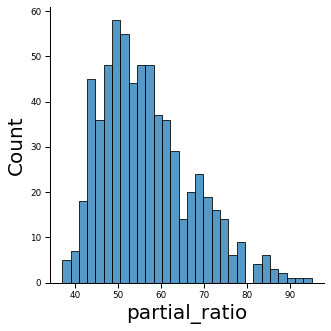

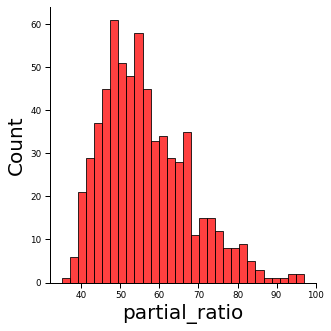

In [72]:
data = data_fuzz[data_fuzz['answer_bin'] > 0]['partial_ratio']

sns.displot(data, bins = 30)

plt.show()

data = data_fuzz[data_fuzz['answer_bin'] == 0]['partial_ratio']

sns.displot(data, bins = 30, color="red")

plt.show()

In [74]:
data_fuzz.head()

,context,question,answer_bin,WRatio,token_sort_ratio,partial_ratio
0,Способность к адаптации сенсорной системы к по...,Является ли сниженние абсолютной чувствительно...,1,86,35,49
1,Обеспечение возможности познания внешнего мира...,"Бывет ли, что люди со выраженным нарушением зр...",0,86,33,53
2,Ощущение положения тела в пространстве связано...,Двигательный анализатор вносит значительный вк...,1,86,56,46
3,Нуждаемость в санитарной обработке не определя...,"Сильные кислоты нельзя отнести к ""агрессивным""...",0,86,52,54
4,"Ведущим фактором лучевого поражения организма,...","Могут ли клетки, сохранившие жизнеспособность,...",1,86,48,57


In [75]:
# TF IDF

In [89]:
corpus = []
corpus_text = ''
for i in range(len(data_fuzz)):
    corpus.append(data_fuzz['context'][i])
    corpus.append(data_fuzz['question'][i])
    corpus_text += data_fuzz['question'][i] + data_fuzz['context'][i]

In [81]:
# tfidfVec = TfidfVectorizer()
# tfidf = tfidfVec.fit_transform(corpus)

In [83]:
# print("\ n Слововая матрица частоты (TF-IDF):")
# print(tfidf)
# print("\ n модель фраз (TF-IDF):")
# print(tfidf.toarray())

In [86]:
from nlp_rake import Rake
import nltk
from nltk.corpus import stopwords
stops = list(set(stopwords.words("russian")))

In [149]:
rake = Rake(stopwords = stops, max_words = 3)

In [150]:
rake.apply(corpus_text) [:10]

[('вы-явление тератогенных свойств', 9.0),
 ('обмундирования стойкими бов', 9.0),
 ('сих пор судят', 9.0),
 ('главное связующее звено', 9.0),
 ('шеррингтона называют ноцицепторами', 9.0),
 ('враженной гиперпродукцией церуллоплазмина', 9.0),
 ('нашла своего объяснения', 9.0),
 ('методики открытых катетеров', 9.0),
 ('купированный медикаментозно пропафенон', 9.0),
 ('глубинные внутриличностные конфликты', 9.0)]

In [151]:
rake.apply(data_fuzz['context'][0]) [:10]

[('адаптации сенсорной системы', 9.0),
 ('повышении дифференциальной чувствительности', 9.0),
 ('показателей функциональной мобильности', 9.0),
 ('понижении абсолютной', 4.0),
 ('уровне рецепторов', 4.0),
 ('способность', 1.0),
 ('основном', 1.0),
 ('заключается', 1.0),
 ('изменении', 1.0),
 ('возбудимости', 1.0)]

In [158]:
data_fuzz['question'][0]

'Является ли сниженние абсолютной чувствительности рецепторов одним из основных способов адаптации сенсорной системы?'

In [156]:
rake.apply(data_fuzz['question'][0])

[('является', 1.0)]

In [91]:
from summa import keywords

In [135]:
import yake

extractor = yake.KeywordExtractor (

    lan = "ru",     # язык
    n = 1,          # максимальное количество слов в фразе
    dedupLim = 0.3, # порог похожести слов
    top = 5        # количество ключевых слов
)

In [136]:
arr = extractor.extract_keywords(corpus_text)
arr

[('действие', 0.0003317203755412491),
 ('Является', 0.0003590981105044654),
 ('крови', 0.0004638343317750434),
 ('оказывает', 0.0005000175568746666),
 ('препарат', 0.0008425406106736422)]

In [137]:
word = extractor.extract_keywords(data_fuzz['context'][0])
word

[('Способность', 0.0987659101264725),
 ('заключается', 0.1023350691964954),
 ('адаптации', 0.13629973302207535),
 ('системы', 0.13629973302207535),
 ('длительно', 0.13629973302207535)]

In [138]:
type(arr[0][1])

numpy.float64

In [139]:
arr.sort(key = lambda x: x[1], reverse=True)

In [140]:
arr

[('препарат', 0.0008425406106736422),
 ('оказывает', 0.0005000175568746666),
 ('крови', 0.0004638343317750434),
 ('Является', 0.0003590981105044654),
 ('действие', 0.0003317203755412491)]

## Text preprocessing

In [161]:
data_fuzz.head()

,context,question,answer_bin,WRatio,token_sort_ratio,partial_ratio
0,Способность к адаптации сенсорной системы к по...,Является ли сниженние абсолютной чувствительно...,1,86,35,49
1,Обеспечение возможности познания внешнего мира...,"Бывет ли, что люди со выраженным нарушением зр...",0,86,33,53
2,Ощущение положения тела в пространстве связано...,Двигательный анализатор вносит значительный вк...,1,86,56,46
3,Нуждаемость в санитарной обработке не определя...,"Сильные кислоты нельзя отнести к ""агрессивным""...",0,86,52,54
4,"Ведущим фактором лучевого поражения организма,...","Могут ли клетки, сохранившие жизнеспособность,...",1,86,48,57


In [162]:
data_merged = data_fuzz.copy()

In [169]:
context_question = []
for i in range(len(data_merged)):
    context_question.append(
    data_merged['context'][i] + data_merged['question'][i])

In [172]:
data_merged['context_question'] = context_question
data_merged = data_merged.drop(['context', 'question'], axis=1)

In [173]:
data_merged.head()

,answer_bin,WRatio,token_sort_ratio,partial_ratio,context_question
0,1,86,35,49,Способность к адаптации сенсорной системы к по...
1,0,86,33,53,Обеспечение возможности познания внешнего мира...
2,1,86,56,46,Ощущение положения тела в пространстве связано...
3,0,86,52,54,Нуждаемость в санитарной обработке не определя...
4,1,86,48,57,"Ведущим фактором лучевого поражения организма,..."


In [175]:
snowball = SnowballStemmer(language="russian")
russian_stop_words = stopwords.words("russian")

def tokenize_sentence(sentence: str, remove_stop_words: bool = True):
    tokens = word_tokenize(sentence, language="russian")
    tokens = [i for i in tokens if i not in string.punctuation]
    if remove_stop_words:
        tokens = [i for i in tokens if i not in russian_stop_words]
    tokens = [snowball.stem(i) for i in tokens]
    return tokens

In [176]:
vectorizer = TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))

## Feature preprocessing

In [188]:
X = pd.DataFrame.sparse.from_spmatrix(
    vectorizer.fit_transform(data_merged["context_question"])
)

In [197]:
# X['WRatio'] = preprocessing.normalize(data_merged['WRatio'])

In [198]:
# preprocessing.normalize(np.array(data_merged['WRatio']))

In [199]:
scaler = MinMaxScaler()

In [202]:
data_normalized = data_merged[['WRatio', 'token_sort_ratio', 'partial_ratio']]

In [205]:
data_normalized = pd.DataFrame(scaler.fit_transform(data_normalized),
            columns=data_normalized.columns, index=data_normalized.index) 

In [206]:
data_normalized

,WRatio,token_sort_ratio,partial_ratio
0,0.954545,0.461538,0.225806
1,0.954545,0.430769,0.290323
2,0.954545,0.784615,0.177419
3,0.954545,0.723077,0.306452
4,0.954545,0.661538,0.354839
...,...,...,...
1303,0.954545,0.476923,0.419355
1304,0.515152,0.153846,0.322581
1305,0.515152,0.153846,0.112903
1306,0.136364,0.123077,0.274194


In [212]:
X = pd.concat([X, data_normalized], axis=1)

In [213]:
X

,0,1,2,3,4,5,6,7,8,9,...,11030,11031,11032,11033,11034,11035,11036,WRatio,token_sort_ratio,partial_ratio
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.954545,0.461538,0.225806
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.954545,0.430769,0.290323
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.954545,0.784615,0.177419
3,0.226588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.954545,0.723077,0.306452
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.176428,0.0,0.0,0.0,0.0,0.0,0.0,0.954545,0.661538,0.354839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.954545,0.476923,0.419355
1304,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.515152,0.153846,0.322581
1305,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.515152,0.153846,0.112903
1306,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.136364,0.123077,0.274194


In [214]:
Y = data_merged['answer_bin']

In [215]:
print(X.shape)
print(Y.shape)

(1308, 11040)
(1308,)


## Modeling

In [216]:
model = LogisticRegression(random_state=0)
model.fit(X, Y)

C:\Users\foa1s\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\foa1s\anaconda3\lib\site-packages\sklearn\utils\validation.py:758: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


LogisticRegression(random_state=0)

In [218]:
df = X.copy()
df['target'] = Y

In [220]:
train_df, test_df = train_test_split(df, test_size=500)

In [221]:
test_df['target'].value_counts()

1    262
0    238
Name: target, dtype: int64

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)